In [1]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [2]:
from malaya_speech.torch_model.vits.model_infer import SynthesizerTrn
from malaya_boilerplate.train.config import HParams
import json

In [3]:
# !pip3 install malaya-boilerplate==0.0.23rc0

In [4]:
config = '/home/husein/malay_vits/osman.json'

In [5]:
with open(config) as fopen:
    hps = HParams(**json.load(fopen))

In [6]:
from malaya_speech.utils.text import TTS_SYMBOLS
import torch

In [7]:
model = SynthesizerTrn(len(TTS_SYMBOLS),
                                   hps.data.filter_length // 2 + 1,
                                   hps.train.segment_size // hps.data.hop_length,
                                   **hps.model)

In [8]:
_ = model.eval()

In [71]:
!ls /home/husein/malay_vits/logs/osman-v2/G_*.pth

/home/husein/malay_vits/logs/osman-v2/G_150000.pth
/home/husein/malay_vits/logs/osman-v2/G_152500.pth
/home/husein/malay_vits/logs/osman-v2/G_155000.pth
/home/husein/malay_vits/logs/osman-v2/G_157500.pth
/home/husein/malay_vits/logs/osman-v2/G_160000.pth
/home/husein/malay_vits/logs/osman-v2/G_162500.pth
/home/husein/malay_vits/logs/osman-v2/G_165000.pth
/home/husein/malay_vits/logs/osman-v2/G_167500.pth
/home/husein/malay_vits/logs/osman-v2/G_170000.pth
/home/husein/malay_vits/logs/osman-v2/G_172500.pth
/home/husein/malay_vits/logs/osman-v2/G_175000.pth
/home/husein/malay_vits/logs/osman-v2/G_177500.pth
/home/husein/malay_vits/logs/osman-v2/G_180000.pth
/home/husein/malay_vits/logs/osman-v2/G_182500.pth
/home/husein/malay_vits/logs/osman-v2/G_185000.pth
/home/husein/malay_vits/logs/osman-v2/G_187500.pth
/home/husein/malay_vits/logs/osman-v2/G_190000.pth
/home/husein/malay_vits/logs/osman-v2/G_192500.pth
/home/husein/malay_vits/logs/osman-v2/G_195000.pth
/home/husein/malay_vits/logs/os

In [35]:
pth = '/home/husein/malay_vits/logs/osman-v2/G_235000.pth'

In [36]:
model.load_state_dict(torch.load(pth, map_location=torch.device('cpu'))['model'])

<All keys matched successfully>

In [37]:
from malaya_speech.torch_model.vits.commons import intersperse
import malaya_speech

In [38]:
normalizer = malaya_speech.utils.text.TextIDS(pad_to = None, is_lower = False)

In [51]:
text = 'Haqkiem adalah pelajar tahun akhir yang mengambil Ijazah Sarjana Muda Sains Komputer Kecerdasan Buatan utama dari Universiti Teknikal Malaysia Melaka (UTeM) yang kini berusaha untuk latihan industri di mana dia secara praktikal dapat menerapkan pengetahuannya dalam Perisikan Perisian dan Pengaturcaraan ke arah organisasi atau industri yang berkaitan.'

In [41]:
text = """
SHAH ALAM - Pertubuhan Kebajikan Anak Bersatu Selangor (PKABS) bersetuju pihak kerajaan mewujudkan Suruhanjaya Siasatan Diraja (RCI) untuk menyiasat isu kartel daging.
"""

In [61]:
text = """
Terdahulu, Rahmadin dan Presiden Gagasan Baru Harapan Malaysia (GBHM), Mohd Zulfitri Mohd Basir telah menghantar memorandum kepada Suruhanjaya Pencegahan Rasuah Malaysia (SPRM) bagi meminta pihak tersebut menjalankan siasatan berkenaan kes kartel daging import haram di Senai, Johor awal Disember lalu.
"""

In [62]:
t, ids = normalizer.normalize(text)
t

'Terdahulu , Rahmadin dan Presiden Gagasan Baru Harapan Malaysia , GBHM , , Mohd Zulfitri Mohd Basir telah menghantar memorandum kepada Suruhanjaya Pencegahan Rasuah Malaysia , SPRM , bagi meminta pihak tersebut menjalankan siasatan berkenaan kes kartel daging import haram di Senai , Johor awal Disember lalu .'

In [63]:
ids = intersperse(ids, 0)

In [64]:
ids = torch.LongTensor(ids)
ids_lengths = torch.LongTensor([ids.size(0)])
ids = ids.unsqueeze(0)

In [65]:
audio = model.infer(
    ids,
    ids_lengths,
    noise_scale=0.66666,
    noise_scale_w=0.66666,
    length_scale=1.0,
)

In [66]:
import matplotlib.pyplot as plt

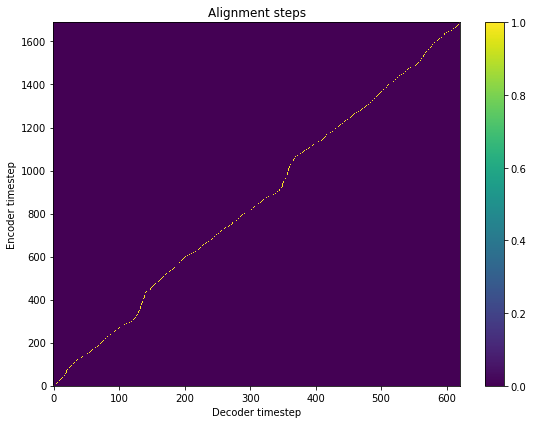

In [67]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.set_title('Alignment steps')
im = ax.imshow(
    audio[1][0,0].detach().numpy(),
    aspect='auto',
    origin='lower',
    interpolation='none')
fig.colorbar(im, ax=ax)
xlabel = 'Decoder timestep'
plt.xlabel(xlabel)
plt.ylabel('Encoder timestep')
plt.tight_layout()
plt.show()

In [68]:
audio[1][0,0].detach().numpy()

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [69]:
y = audio[0][0,0].detach().numpy()

In [70]:
import IPython.display as ipd
ipd.Audio(y, rate = 22050)

In [72]:
torch.save(model.state_dict(), 'osman.pth')

In [73]:
!ls *.pth

osman.pth


In [74]:
from malaya_boilerplate.huggingface import upload_dict

In [75]:
files_mapping = {'osman.pth': 'model.pth',
                config: 'config.json'}
upload_dict(model = 'VITS-osman', files_mapping = files_mapping, username = 'mesolitica')

/home/husein/.local/lib/python3.8/site-packages/huggingface_hub/hf_api.py:102: FutureWarning: `name` and `organization` input arguments are deprecated and will be removed in v0.10. Pass `repo_id` instead.
  warnings.warn(
409 Client Error: Conflict for url: https://huggingface.co/api/repos/create (Request ID: miFaOAhTpvl29AIMMhIX9) - You already created this model repo


In [81]:
!ls -lh /home/husein/malay_vits/logs/osman-v2

total 34G
-rw-r--r-- 1 husein husein 1.4K Sep  16 23:22 config.json
-rw-r--r-- 1 husein husein 536M Sep  17 21:25 D_150000.pth
-rw-r--r-- 1 husein husein 536M Sep  17 21:47 D_152500.pth
-rw-r--r-- 1 husein husein 536M Sep  17 22:09 D_155000.pth
-rw-r--r-- 1 husein husein 536M Sep  17 22:31 D_157500.pth
-rw-r--r-- 1 husein husein 536M Sep  17 22:53 D_160000.pth
-rw-r--r-- 1 husein husein 536M Sep  17 23:15 D_162500.pth
-rw-r--r-- 1 husein husein 536M Sep  17 23:36 D_165000.pth
-rw-r--r-- 1 husein husein 536M Sep  17 23:58 D_167500.pth
-rw-r--r-- 1 husein husein 536M Sep  18 00:20 D_170000.pth
-rw-r--r-- 1 husein husein 536M Sep  18 00:42 D_172500.pth
-rw-r--r-- 1 husein husein 536M Sep  18 01:04 D_175000.pth
-rw-r--r-- 1 husein husein 536M Sep  18 01:26 D_177500.pth
-rw-r--r-- 1 husein husein 536M Sep  18 01:48 D_180000.pth
-rw-r--r-- 1 husein husein 536M Sep  18 02:10 D_182500.pth
-rw-r--r-- 1 husein husein 536M Sep  18 02:32 D_185000.pth
-rw-r--r-- 1 husein husein 536M Sep  18 02:54 D

In [77]:
!mkdir pretrained-osman

In [78]:
!cp /home/husein/malay_vits/logs/osman-v2/*_237500.pth pretrained-osman
!cp /home/husein/malay_vits/logs/osman-v2/config.json pretrained-osman
!cp /home/husein/malay_vits/logs/osman-v2/events.out* pretrained-osman

In [85]:
!ls -lh pretrained-osman

total 1.1G
-rw-r--r-- 1 husein husein 1.4K Sep  18 10:35 config.json
-rw-r--r-- 1 husein husein 536M Sep  18 10:35 D_237500.pth
-rw-r--r-- 1 husein husein 153M Sep  18 10:35 events.out.tfevents.1663341739.husein-MS-7D31.2975222.0
-rw-r--r-- 1 husein husein 417M Sep  18 10:35 G_237500.pth


In [84]:
!tar -cvf pretrained-osman.tar pretrained-osman

pretrained-osman/
pretrained-osman/events.out.tfevents.1663341739.husein-MS-7D31.2975222.0
pretrained-osman/config.json
pretrained-osman/D_237500.pth
pretrained-osman/G_237500.pth


In [ ]:
files_mapping = {'pretrained-osman.tar': 'pretrained-osman.tar'}
upload_dict(model = 'VITS-osman', files_mapping = files_mapping, username = 'mesolitica')

409 Client Error: Conflict for url: https://huggingface.co/api/repos/create (Request ID: WTk4MwecyzMj12aKKdCjE) - You already created this model repo
